In [5]:
%pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [14]:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B']
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'D'

In [10]:
grafo_e2 = {
    'A': ['B','C'],
    'B': ['A','D','E'],
    'C': ['A'],
    'D': ['B'],
    'E': ['B','F','G'],
    'F': ['E'],
    'G': ['E'] 
}
nodo_inicio_e2 = 'A'
nodo_objetivo_e2 = 'F'

In [11]:
grafo_e3 = {
    'A': ['B','C', 'D'],
    'B': ['A','E'],
    'C': ['A','E'],
    'D': ['A','F'],
    'E': ['B','C'],
    'F': ['D']
}
nodo_inicio_e3 = 'A'
nodo_objetivo_e3 = 'E'

In [8]:
# Definimos nuestro algoritmo de búsqueda:

def busqueda_amplitud(grafo, inicio, objetivo):
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        print("\nIteración:", i)
        print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            print("Camino encontrado:", "->".join(camino))
            return camino
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    print("No se encontró un camino al nodo objetivo.")
    return None

In [15]:
# Realizamos la búsqueda en amplitud
camino = busqueda_amplitud(grafo, nodo_inicio, nodo_objetivo)


Iteración: 1
Nodo actual: A
Nodos visitados {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'C']

Iteración: 2
Nodo actual: B
Nodos visitados {'A', 'B'}
Nueva ruta: ['A', 'B', 'D']

Iteración: 3
Nodo actual: C
Nodos visitados {'C', 'A', 'B'}

Iteración: 4
Nodo actual: D
Camino encontrado: A->B->D


In [16]:
camino_e2 = busqueda_amplitud(grafo_e2, nodo_inicio_e2, nodo_objetivo_e2)


Iteración: 1
Nodo actual: A
Nodos visitados {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'C']

Iteración: 2
Nodo actual: B
Nodos visitados {'A', 'B'}
Nueva ruta: ['A', 'B', 'D']
Nueva ruta: ['A', 'B', 'E']

Iteración: 3
Nodo actual: C
Nodos visitados {'C', 'A', 'B'}

Iteración: 4
Nodo actual: D
Nodos visitados {'D', 'C', 'A', 'B'}

Iteración: 5
Nodo actual: E
Nodos visitados {'D', 'A', 'B', 'E', 'C'}
Nueva ruta: ['A', 'B', 'E', 'F']
Nueva ruta: ['A', 'B', 'E', 'G']

Iteración: 6
Nodo actual: F
Camino encontrado: A->B->E->F


In [17]:
camino_e3 = busqueda_amplitud(grafo_e3, nodo_inicio_e3, nodo_objetivo_e3)


Iteración: 1
Nodo actual: A
Nodos visitados {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'C']
Nueva ruta: ['A', 'D']

Iteración: 2
Nodo actual: B
Nodos visitados {'A', 'B'}
Nueva ruta: ['A', 'B', 'E']

Iteración: 3
Nodo actual: C
Nodos visitados {'C', 'A', 'B'}
Nueva ruta: ['A', 'C', 'E']

Iteración: 4
Nodo actual: D
Nodos visitados {'D', 'C', 'A', 'B'}
Nueva ruta: ['A', 'D', 'F']

Iteración: 5
Nodo actual: E
Camino encontrado: A->B->E


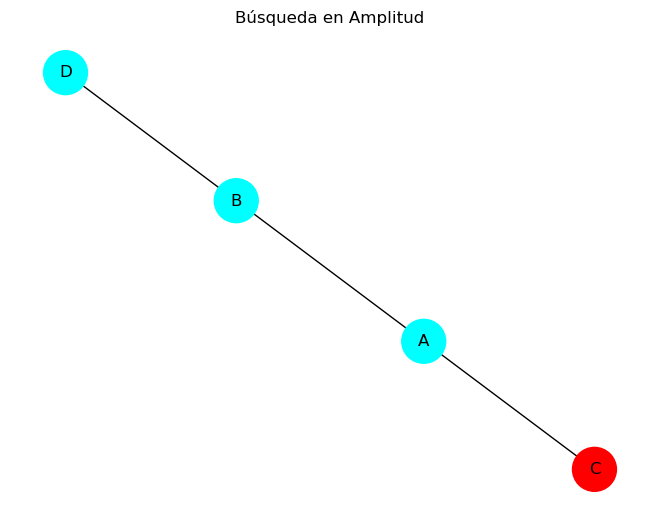

In [18]:
# Creamos el gráfico
G = nx.Graph(grafo)

# Coloreamos los nodos según si están en el camino o no
colores = ['cyan' if nodo in camino else 'red' for nodo in G.nodes()]

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()

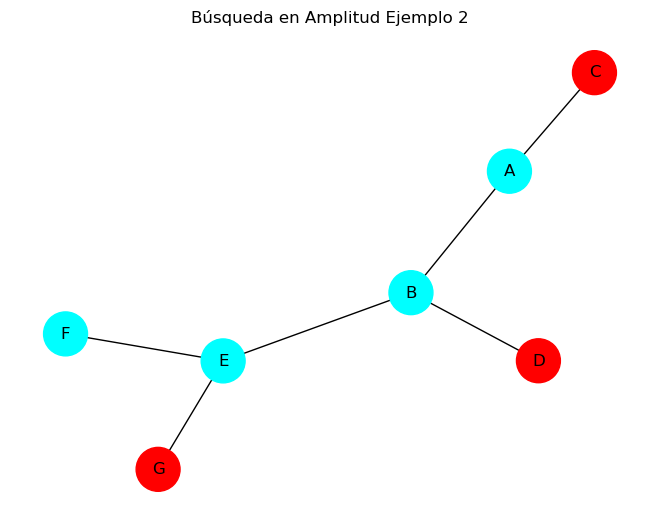

In [19]:
# Creamos el gráfico
G2 = nx.Graph(grafo_e2)

# Coloreamos los nodos según si están en el camino o no
colores = ['cyan' if nodo in camino_e2 else 'red' for nodo in G2.nodes()]

# Dibujamos el grafo
pos2 = nx.spring_layout(G2)
nx.draw(G2, pos2, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud Ejemplo 2")
plt.show()

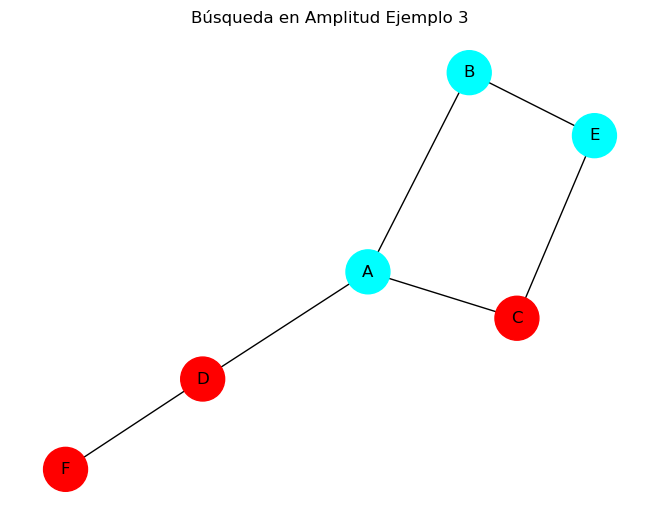

In [20]:
# Creamos el gráfico
G3 = nx.Graph(grafo_e3)

# Coloreamos los nodos según si están en el camino o no
colores = ['cyan' if nodo in camino_e3 else 'red' for nodo in G3.nodes()]

# Dibujamos el grafo
pos3 = nx.spring_layout(G3)
nx.draw(G3, pos3, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud Ejemplo 3")
plt.show()

In [1]:
# Definimos el grafo como un diccionario de listas de adyacencia con pesos
grafo = {
    'A': [('B', 3), ('F', 5)],
    'B': [('C', 5), ('D', 9)],
    'C': [],
    'D': [],
    'E': [],
    'F': [('D', 6)]
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'E'


In [6]:
from collections import deque

# Definimos el algoritmo de búsqueda en amplitud
def busqueda_amplitud(grafo, inicio, objetivo):
   
    visitados = set()
    
    cola = deque([(inicio, [inicio])])

    i = 1  # Contador de iteraciones
    while cola:
    
        nodo_actual, camino = cola.popleft()
        print("\nIteración:", i)
        print("Nodo actual:", nodo_actual)
        
        # Si encontramos el nodo objetivo, retornamos el camino
        if nodo_actual == objetivo:
            print("Camino encontrado:", " -> ".join(camino))
            return camino
        
        # Si el nodo actual no ha sido visitado, lo añadimos a visitados
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            print("Nodos visitados:", visitados)
            
            # Recorremos los vecinos del nodo actual
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    # Generamos un nuevo camino con el vecino actual
                    nueva_ruta = camino + [vecino]
                    print("Nueva ruta:", nueva_ruta)
                    # Añadimos el vecino y la nueva ruta a la cola para ser explorados
                    cola.append((vecino, nueva_ruta))
        
        i += 1  # Aumentamos el contador de iteraciones

    # Si no encontramos un camino, indicamos que no se encontró el nodo objetivo
    print("No se encontró un camino al nodo objetivo.")
    return None


# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'F'],
    'B': ['C', 'D'],
    'C': [],
    'D': [],
    'E': [],
    'F': ['D']
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'E'

# Ejecutamos la búsqueda en amplitud
camino = busqueda_amplitud(grafo, nodo_inicio, nodo_objetivo)



Iteración: 1
Nodo actual: A
Nodos visitados: {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'F']

Iteración: 2
Nodo actual: B
Nodos visitados: {'A', 'B'}
Nueva ruta: ['A', 'B', 'C']
Nueva ruta: ['A', 'B', 'D']

Iteración: 3
Nodo actual: F
Nodos visitados: {'A', 'F', 'B'}
Nueva ruta: ['A', 'F', 'D']

Iteración: 4
Nodo actual: C
Nodos visitados: {'C', 'A', 'F', 'B'}

Iteración: 5
Nodo actual: D
Nodos visitados: {'C', 'F', 'B', 'D', 'A'}

Iteración: 6
Nodo actual: D
No se encontró un camino al nodo objetivo.


In [7]:
# Definimos el algoritmo de búsqueda en profundidad
def busqueda_profundidad(grafo, inicio, objetivo, camino=None, visitados=None, i=1):
    if camino is None:
        camino = [inicio]
    if visitados is None:
        visitados = set()

    nodo_actual = camino[-1]
    print("\nIteración:", i)
    print("Nodo actual:", nodo_actual)

    # Si encontramos el nodo objetivo, retornamos el camino
    if nodo_actual == objetivo:
        print("Camino encontrado:", " -> ".join(camino))
        return camino

    # Si el nodo actual no ha sido visitado, lo añadimos a visitados
    if nodo_actual not in visitados:
        visitados.add(nodo_actual)
        print("Nodos visitados:", visitados)

        # Recorremos los vecinos del nodo actual
        for vecino in grafo[nodo_actual]:
            if vecino not in visitados:
                # Creamos un nuevo camino con el vecino actual
                nueva_ruta = camino + [vecino]
                print("Nueva ruta:", nueva_ruta)

                # Realizamos la llamada recursiva a DFS con el vecino
                resultado = busqueda_profundidad(grafo, vecino, objetivo, nueva_ruta, visitados, i+1)
                if resultado:
                    return resultado  # Si encontramos el camino, retornamos

    # Si no encontramos el camino, retornamos None
    print(f"Regresando de {nodo_actual}")
    return None


# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'F'],
    'B': ['C', 'D'],
    'C': [],
    'D': [],
    'E': [],
    'F': ['D']
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'E'

# Ejecutamos la búsqueda en profundidad
camino_dfs = busqueda_profundidad(grafo, nodo_inicio, nodo_objetivo)



Iteración: 1
Nodo actual: A
Nodos visitados: {'A'}
Nueva ruta: ['A', 'B']

Iteración: 2
Nodo actual: B
Nodos visitados: {'A', 'B'}
Nueva ruta: ['A', 'B', 'C']

Iteración: 3
Nodo actual: C
Nodos visitados: {'C', 'A', 'B'}
Regresando de C
Nueva ruta: ['A', 'B', 'D']

Iteración: 3
Nodo actual: D
Nodos visitados: {'C', 'A', 'B', 'D'}
Regresando de D
Regresando de B
Nueva ruta: ['A', 'F']

Iteración: 2
Nodo actual: F
Nodos visitados: {'C', 'F', 'B', 'D', 'A'}
Regresando de F
Regresando de A


In [8]:
import heapq  # Para manejar la cola de prioridad


def busqueda_costo_uniforme(grafo, inicio, objetivo):
   
    cola_prioridad = [(0, inicio, [inicio])]
    visitados = set()

    i = 1  
    while cola_prioridad:

        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
        print("\nIteración:", i)
        print("Nodo actual:", nodo_actual, "con costo actual:", costo_actual)

        
        if nodo_actual == objetivo:
            print("Camino encontrado:", " -> ".join(camino))
            print("Costo total:", costo_actual)
            return camino, costo_actual

        # Si el nodo no ha sido visitado, lo añadimos a visitados
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            print("Nodos visitados:", visitados)

            # Recorremos los vecinos del nodo actual
            for vecino, costo in grafo[nodo_actual]:
                if vecino not in visitados:
                    # Calculamos el costo total acumulado hasta el vecino
                    nuevo_costo = costo_actual + costo
                    nueva_ruta = camino + [vecino]
                    print("Nueva ruta:", nueva_ruta, "con costo:", nuevo_costo)
                    # Añadimos el vecino a la cola de prioridad con su costo
                    heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nueva_ruta))

        i += 1

    print("No se encontró un camino al nodo objetivo.")
    return None


grafo = {
    'A': [('B', 3), ('F', 5)],
    'B': [('C', 5), ('D', 9)],
    'C': [('E', 2)],  
    'D': [('E', 7)],
    'E': [],
    'F': [('D', 6)]
}


nodo_inicio = 'A'
nodo_objetivo = 'E'


camino_ucs, costo_total = busqueda_costo_uniforme(grafo, nodo_inicio, nodo_objetivo)



Iteración: 1
Nodo actual: A con costo actual: 0
Nodos visitados: {'A'}
Nueva ruta: ['A', 'B'] con costo: 3
Nueva ruta: ['A', 'F'] con costo: 5

Iteración: 2
Nodo actual: B con costo actual: 3
Nodos visitados: {'A', 'B'}
Nueva ruta: ['A', 'B', 'C'] con costo: 8
Nueva ruta: ['A', 'B', 'D'] con costo: 12

Iteración: 3
Nodo actual: F con costo actual: 5
Nodos visitados: {'A', 'F', 'B'}
Nueva ruta: ['A', 'F', 'D'] con costo: 11

Iteración: 4
Nodo actual: C con costo actual: 8
Nodos visitados: {'C', 'A', 'F', 'B'}
Nueva ruta: ['A', 'B', 'C', 'E'] con costo: 10

Iteración: 5
Nodo actual: E con costo actual: 10
Camino encontrado: A -> B -> C -> E
Costo total: 10
